In [1]:
#Librairie

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #permet d'exécuter et afficher plusieurs calcul dans 1 cellule jupyternotebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset
titre_ak = pd.read_csv("title.akas.tsv", sep = "\t")
titre_ak.head()

("--------------------------------------------------")
titre_ak.shape
("--------------------------------------------------")
titre_ak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51597398 entries, 0 to 51597397
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  int64 
dtypes: int64(2), object(6)
memory usage: 3.1+ GB


In [3]:
# Quel est le pourcentage de films par régions 
titre_ak['region'].sort_values(ascending=False).value_counts()*100/titre_ak.shape[0]

region
\N    22.466472
DE     9.822912
JP     9.817983
FR     9.778749
IN     9.689946
        ...    
CC     0.000004
TV     0.000002
PW     0.000002
NU     0.000002
NR     0.000002
Name: count, Length: 248, dtype: float64

In [5]:
# => conservation que les films de la région = FR
titre_ak_fr = titre_ak[titre_ak['region']=='FR']

titre_ak_fr.head()
("--------------------------------------------------")
titre_ak_fr.shape

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
12,tt0000002,5,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0
21,tt0000003,5,Pauvre Pierrot,FR,\N,imdbDisplay,\N,0
30,tt0000004,5,Un bon bock,FR,\N,imdbDisplay,\N,0
82,tt0000010,12,La sortie de l'usine Lumière,FR,\N,alternative,\N,0
83,tt0000010,13,La sortie des ouvriers de l'usine Lumière,FR,\N,\N,informal alternative title,0


'--------------------------------------------------'

(5045580, 8)

In [7]:
# remplacer les \N de language par FR
titre_ak_fr = titre_ak_fr.replace('\\N','fr')
titre_ak_fr.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
12,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0
21,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0
30,tt0000004,5,Un bon bock,FR,fr,imdbDisplay,fr,0
82,tt0000010,12,La sortie de l'usine Lumière,FR,fr,alternative,fr,0
83,tt0000010,13,La sortie des ouvriers de l'usine Lumière,FR,fr,fr,informal alternative title,0


In [9]:
titre_ak_fr["title"].unique

<bound method Series.unique of 12                             Le clown et ses chiens
21                                     Pauvre Pierrot
30                                        Un bon bock
82                       La sortie de l'usine Lumière
83          La sortie des ouvriers de l'usine Lumière
                              ...                    
51597358                                Épisode #3.15
51597366                                Épisode #3.18
51597374                                Épisode #3.17
51597382                                Épisode #3.19
51597390                                Épisode #3.20
Name: title, Length: 5045580, dtype: object>

In [11]:
# éliminer les épisodes et les ''#'' du dataset pour selectionner uniquement les films
titre_ak_fr = titre_ak_fr[titre_ak_fr["title"].str.contains('Épisode')==False]
titre_ak_fr = titre_ak_fr[titre_ak_fr["title"].str.contains('Episode')==False]
titre_ak_fr = titre_ak_fr[titre_ak_fr["title"].str.contains('#')==False]
titre_ak_fr.head()


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
12,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0
21,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0
30,tt0000004,5,Un bon bock,FR,fr,imdbDisplay,fr,0
82,tt0000010,12,La sortie de l'usine Lumière,FR,fr,alternative,fr,0
83,tt0000010,13,La sortie des ouvriers de l'usine Lumière,FR,fr,fr,informal alternative title,0


In [13]:
# renommer titleId en tconst car il va me permettre d'être la clé entre titre_ak_fr et le dataset title.principals
titre_ak_fr.rename({'titleId': 'tconst'}, axis=1, inplace = True)
titre_ak_fr.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
12,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0
21,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0
30,tt0000004,5,Un bon bock,FR,fr,imdbDisplay,fr,0
82,tt0000010,12,La sortie de l'usine Lumière,FR,fr,alternative,fr,0
83,tt0000010,13,La sortie des ouvriers de l'usine Lumière,FR,fr,fr,informal alternative title,0


In [15]:
# import dataset title.principals
titre_principals = pd.read_csv("title.principals.tsv", sep = "\t")

titre_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [17]:
# merge de title.akas et title.principals sur tconst
films = titre_ak_fr.merge(titre_principals, on='tconst', how='left')
films.head()

,tconst,ordering_x,title,region,language,types,attributes,isOriginalTitle,ordering_y,nconst,category,job,characters
0,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0,1.0,nm0721526,director,\N,\N
1,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0,2.0,nm1335271,composer,\N,\N
2,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,1.0,nm0721526,director,\N,\N
3,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,2.0,nm0721526,writer,\N,\N
4,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,3.0,nm1770680,producer,producer,\N


In [19]:
# regarde le nombre de lignes que je conserve après mon merge
films.shape[0] - titre_principals.shape[0]
("--------------------------------------------------")
films.shape[0]

-88522626

'--------------------------------------------------'

3140956

In [21]:
# import dataset title.basics
titre_basics = pd.read_csv("title.basics.tsv", sep = "\t")

titre_basics.head()

C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\176428438.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titre_basics = pd.read_csv("title.basics.tsv", sep = "\t")


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [174]:
# merge de films et titre_basics sur tconst
films_1 = films.merge(titre_basics, on='tconst', how='left')

films_1.head()

,tconst,ordering_x,title,region,language,types,attributes,isOriginalTitle,ordering_y,nconst,...,job,characters,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0,1.0,nm0721526,...,\N,\N,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
1,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0,2.0,nm1335271,...,\N,\N,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,1.0,nm0721526,...,\N,\N,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,2.0,nm0721526,...,\N,\N,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
4,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,3.0,nm1770680,...,producer,\N,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"


In [25]:
# regarde le nombre de lignes que je conserve après mon merge
films.shape[0] - films_1.shape[0]
("--------------------------------------------------")
films_1.shape[0]

0

'--------------------------------------------------'

3140956

In [27]:
# import dataset title.ratings
note_films = pd.read_csv("title.ratings.tsv", sep = "\t")
note_films.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2142
1,tt0000002,5.5,290
2,tt0000003,6.4,2178
3,tt0000004,5.3,186
4,tt0000005,6.2,2913


In [29]:
# merge de title.akas.principals.basics et title.ratings sur tconst
films_1 = films_1.merge(note_films, on='tconst', how='left')
films_1.head()

,tconst,ordering_x,title,region,language,types,attributes,isOriginalTitle,ordering_y,nconst,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0,1.0,nm0721526,...,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.5,290.0
1,tt0000002,5,Le clown et ses chiens,FR,fr,imdbDisplay,fr,0,2.0,nm1335271,...,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.5,290.0
2,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,1.0,nm0721526,...,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance",6.4,2178.0
3,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,2.0,nm0721526,...,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance",6.4,2178.0
4,tt0000003,5,Pauvre Pierrot,FR,fr,imdbDisplay,fr,0,3.0,nm1770680,...,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance",6.4,2178.0


In [31]:
# suppression des colonnes non souhaitées
films_final = films_1.drop(columns=['ordering_x', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle', 'ordering_y', 'nconst', 'category',
       'job', 'characters', 'primaryTitle', 'originalTitle', 'endYear'], axis=1)

films_final.head()

,tconst,title,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000002,Le clown et ses chiens,short,0,1892,5,"Animation,Short",5.5,290.0
1,tt0000002,Le clown et ses chiens,short,0,1892,5,"Animation,Short",5.5,290.0
2,tt0000003,Pauvre Pierrot,short,0,1892,5,"Animation,Comedy,Romance",6.4,2178.0
3,tt0000003,Pauvre Pierrot,short,0,1892,5,"Animation,Comedy,Romance",6.4,2178.0
4,tt0000003,Pauvre Pierrot,short,0,1892,5,"Animation,Comedy,Romance",6.4,2178.0


In [35]:
# Quel est le pourcentage de films par régions 
films_final['titleType'].sort_values(ascending=False).value_counts()*100/titre_ak.shape[0]

titleType
movie           3.203518
short           0.774956
tvEpisode       0.690469
tvMovie         0.646730
tvSeries        0.407125
video           0.217143
tvMiniSeries    0.088692
videoGame       0.030091
tvSpecial       0.021152
tvShort         0.007506
Name: count, dtype: float64

In [57]:
films_final.isnull().sum()

tconst             0
title              0
titleType         25
isAdult           25
startYear         25
runtimeMinutes    25
genres            25
dtype: int64

In [33]:
# remplacer les \N par des NaN
films_final = films_final.replace('\\N',np.NaN)

tconst                 0
title                  0
titleType             25
isAdult               25
startYear          19958
runtimeMinutes    416433
genres             91372
averageRating     863808
numVotes          863808
dtype: int64

In [39]:
# combien de valeurs manquantes ?
films_final.isnull().sum().sort_values(ascending=False)/len(films_final)*100
("--------------------------------------------------")
films_final.shape

averageRating     27.501436
numVotes          27.501436
runtimeMinutes    13.258161
genres             2.909051
startYear          0.635412
titleType          0.000796
isAdult            0.000796
tconst             0.000000
title              0.000000
dtype: float64

'--------------------------------------------------'

(3140956, 9)

In [43]:
# suppression des valeurs manquantes
films_final = films_final.dropna()
("--------------------------------------------------")
films_final.shape

'--------------------------------------------------'

(2154785, 9)

In [45]:
# new dataframe avec split pour récuperer le genre attribué à chaqu film
genre_films = films_final["genres"].str.split(",", n = 2, expand = True)
# on renomme les 3 nouvelles colonnes 
genre_films = genre_films.rename(columns={0: "genre_1",1: "genre_2", 2: "genre_3"})
genre_films.head()

,genre_1,genre_2,genre_3
0,Animation,Short,None
1,Animation,Short,None
2,Animation,Comedy,Romance
3,Animation,Comedy,Romance
4,Animation,Comedy,Romance


In [176]:
# on les ajoute au df d'origine et on supprime la colonne 'genres'
films_final1 = pd.concat([films_final, genre_films], axis=1)
films_final1 = films_final1.drop(columns='genres', axis=1)
films_final1.head()

,tconst,title,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
0,tt0000002,Le clown et ses chiens,short,0,1892,5,5.5,290.0,Animation,Short,None
1,tt0000002,Le clown et ses chiens,short,0,1892,5,5.5,290.0,Animation,Short,None
2,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance
3,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance
4,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance


In [178]:
# Elimination de tous les genres Adult dans les colonnes genre1 genre2 et genre3
films_final1.shape[0]
("--------------------------------------------------")
films_final1 = films_final1.drop(films_final1[films_final1['genre_1']=='Adult'].index)
films_final1 = films_final1.drop(films_final1[films_final1['genre_2']=='Adult'].index)
films_final1 = films_final1.drop(films_final1[films_final1['genre_3']=='Adult'].index)

films_final1.head()
("--------------------------------------------------")
films_final1.shape[0]

2154785

'--------------------------------------------------'

,tconst,title,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
0,tt0000002,Le clown et ses chiens,short,0,1892,5,5.5,290.0,Animation,Short,None
1,tt0000002,Le clown et ses chiens,short,0,1892,5,5.5,290.0,Animation,Short,None
2,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance
3,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance
4,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance


'--------------------------------------------------'

2112230

In [180]:
# suppression des lignes où isAdult==1
films_final1.shape[0]
("--------------------------------------------------")
films_final1 = films_final1.drop(films_final1[films_final1.isAdult==1].index)
films_final1.head()

films_final1.shape[0]

2112230

'--------------------------------------------------'

,tconst,title,titleType,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
0,tt0000002,Le clown et ses chiens,short,0,1892,5,5.5,290.0,Animation,Short,None
1,tt0000002,Le clown et ses chiens,short,0,1892,5,5.5,290.0,Animation,Short,None
2,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance
3,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance
4,tt0000003,Pauvre Pierrot,short,0,1892,5,6.4,2178.0,Animation,Comedy,Romance


2111057

In [182]:
# vérif élimination des films avec genre Adult et isAdult=1
print(films_final1[films_final1['genre_1']=='Adult'])
print(films_final1[films_final1['genre_2']=='Adult'])
print(films_final1[films_final1['genre_3']=='Adult'])
print(films_final1[films_final1['isAdult']==1])

Empty DataFrame
Columns: [tconst, title, titleType, isAdult, startYear, runtimeMinutes, averageRating, numVotes, genre_1, genre_2, genre_3]
Index: []
Empty DataFrame
Columns: [tconst, title, titleType, isAdult, startYear, runtimeMinutes, averageRating, numVotes, genre_1, genre_2, genre_3]
Index: []
Empty DataFrame
Columns: [tconst, title, titleType, isAdult, startYear, runtimeMinutes, averageRating, numVotes, genre_1, genre_2, genre_3]
Index: []
Empty DataFrame
Columns: [tconst, title, titleType, isAdult, startYear, runtimeMinutes, averageRating, numVotes, genre_1, genre_2, genre_3]
Index: []


In [184]:
# suppression de la colonne isAdult
films_final1 = films_final1.drop(columns='isAdult', axis=1)
films_final1.head(2)

,tconst,title,titleType,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
0,tt0000002,Le clown et ses chiens,short,1892,5,5.5,290.0,Animation,Short,None
1,tt0000002,Le clown et ses chiens,short,1892,5,5.5,290.0,Animation,Short,None


In [186]:
# on ne conserve que titleType = movie

films_final1.shape[0]
("--------------------------------------------------")
films_final1 = films_final1[films_final1['titleType']=='movie']

films_final1.shape[0]

2111057

'--------------------------------------------------'

1439839

In [188]:
# regroupement par tconst (regroupement par film)

films_final1.shape[0]
("--------------------------------------------------")
films_final1 = films_final1.drop_duplicates(subset='tconst')

films_final1.shape[0]

1439839

'--------------------------------------------------'

69532

In [190]:
films_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69532 entries, 792 to 3140926
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          69532 non-null  object 
 1   title           69532 non-null  object 
 2   titleType       69532 non-null  object 
 3   startYear       69532 non-null  object 
 4   runtimeMinutes  69532 non-null  object 
 5   averageRating   69532 non-null  float64
 6   numVotes        69532 non-null  float64
 7   genre_1         69532 non-null  object 
 8   genre_2         46694 non-null  object 
 9   genre_3         26006 non-null  object 
dtypes: float64(2), object(8)
memory usage: 5.8+ MB


In [192]:
# transforme startYear et runtimeMinutes de object en int32
films_final1 = films_final1.astype({'startYear': 'int32'})
films_final1 = films_final1.astype({'runtimeMinutes': 'int32'})
films_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69532 entries, 792 to 3140926
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          69532 non-null  object 
 1   title           69532 non-null  object 
 2   titleType       69532 non-null  object 
 3   startYear       69532 non-null  int32  
 4   runtimeMinutes  69532 non-null  int32  
 5   averageRating   69532 non-null  float64
 6   numVotes        69532 non-null  float64
 7   genre_1         69532 non-null  object 
 8   genre_2         46694 non-null  object 
 9   genre_3         26006 non-null  object 
dtypes: float64(2), int32(2), object(6)
memory usage: 5.3+ MB


In [194]:
# éliminer films années < 1950 et classer par startYear

films_final1.shape[0]
("--------------------------------------------------")
films_final1 = films_final1[films_final1['startYear']>=1950].sort_values(by=['startYear'])

films_final1.shape[0]

69532

'--------------------------------------------------'

61631

In [196]:
films_final1.head()

,tconst,title,titleType,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
175545,tt0042895,Rio Grande,movie,1950,105,7.0,18448.0,Drama,Romance,Western
182572,tt0043860,Jennifer,movie,1950,89,6.6,142.0,Drama,None,None
175526,tt0042893,Jour de chance,movie,1950,112,6.2,612.0,Comedy,None,None
175506,tt0042883,Une rousse obstinée,movie,1950,90,6.2,425.0,Comedy,Romance,None
927218,tt0197255,L'atomique Monsieur Placido,movie,1950,80,4.6,13.0,Comedy,Crime,None


In [198]:
# reset de l'index
films_final1 = films_final1.reset_index(drop=True)

films_final1.head()

,tconst,title,titleType,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
0,tt0042895,Rio Grande,movie,1950,105,7.0,18448.0,Drama,Romance,Western
1,tt0043860,Jennifer,movie,1950,89,6.6,142.0,Drama,None,None
2,tt0042893,Jour de chance,movie,1950,112,6.2,612.0,Comedy,None,None
3,tt0042883,Une rousse obstinée,movie,1950,90,6.2,425.0,Comedy,Romance,None
4,tt0197255,L'atomique Monsieur Placido,movie,1950,80,4.6,13.0,Comedy,Crime,None


In [73]:
# stats sur numVotes
print(f"moyenne : {round(films_final1['numVotes'].mean(),2)}")
print(f"mediane : {films_final1['numVotes'].median()}")
print(f"max : {films_final1['numVotes'].max()}")
print(f"min : {films_final1['numVotes'].min()}")

moyenne : 17687.91
mediane : 802.0
max : 3022948.0
min : 5.0


<Axes: >

(0.0, 10000.0)

Text(0.5, 1.0, 'Dispersion des votes')

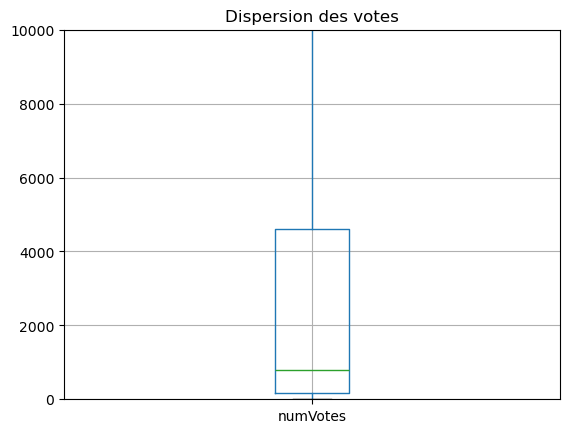

In [75]:
# boxplot sur numVotes
films_final1.boxplot(column='numVotes')
plt.ylim(0,10000)
plt.title('Dispersion des votes')

In [81]:
# stats sur averageRating
print(f"moyenne : {round(films_final1['averageRating'].mean(),2)}")
print(f"mediane : {films_final1['averageRating'].median()}")
print(f"max : {films_final1['averageRating'].max()}")
print(f"min : {films_final1['averageRating'].min()}")

moyenne : 6.07
mediane : 6.2
max : 9.9
min : 1.1


<Axes: >

Text(0.5, 1.0, 'Dispersion des notes')

<Axes: >

(0.0, 10.0)

Text(0.5, 1.0, 'Dispersion des notes')

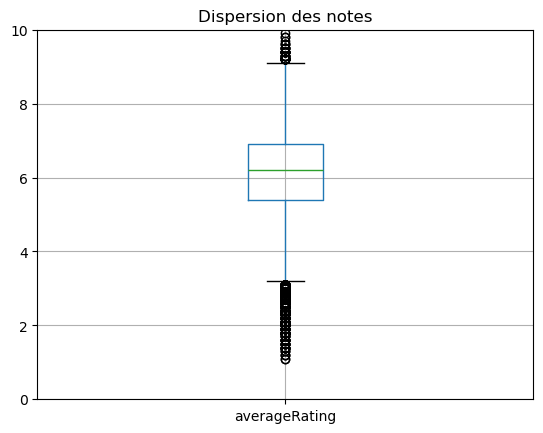

In [99]:
# boxplot sur averageRating
films_final1.boxplot(column='averageRating')
plt.ylim(0,10)
plt.title('Dispersion des notes')
plt.show()

In [200]:
films_final1["startYear"].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [204]:
# pour créer des categories à partir d'une variable existante (discretization)
films_final1["year_category"] = pd.cut(x = films_final1['startYear'],
                                   bins = [1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025],
                                   labels = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'])

# réordonner les colonnes
films_final1 = films_final1[films_final1.columns[[0,1,2,10,3,4,5,6,7,8,9]]]

films_final1.head()

,tconst,title,titleType,year_category,startYear,runtimeMinutes,averageRating,numVotes,genre_1,genre_2,genre_3
0,tt0042895,Rio Grande,movie,1950s,1950,105,7.0,18448.0,Drama,Romance,Western
1,tt0043860,Jennifer,movie,1950s,1950,89,6.6,142.0,Drama,None,None
2,tt0042893,Jour de chance,movie,1950s,1950,112,6.2,612.0,Comedy,None,None
3,tt0042883,Une rousse obstinée,movie,1950s,1950,90,6.2,425.0,Comedy,Romance,None
4,tt0197255,L'atomique Monsieur Placido,movie,1950s,1950,80,4.6,13.0,Comedy,Crime,None


# Partie machine learning

In [208]:
#Librairie

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

# récupérer les valeurs de genre_1 pour en faire une colonne pour chaque genre
# pour encoder les genres avec OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(films_final1[['genre_1']])
ohe.get_feature_names_out(["genre_1"])
ohe.transform(films_final1[['genre_1']])
films_final1[ohe.get_feature_names_out(["genre_1"])] = ohe.transform(films_final1[["genre_1"]])

# pour encoder les genre_2 avec OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(films_final1[['genre_2']])
ohe.get_feature_names_out(["genre_2"])
ohe.transform(films_final1[['genre_2']])
films_final1[ohe.get_feature_names_out(["genre_2"])] = ohe.transform(films_final1[["genre_2"]])

# pour encoder les genre_3 avec OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(films_final1[['genre_3']])
ohe.get_feature_names_out(["genre_3"])
ohe.transform(films_final1[['genre_3']])
films_final1[ohe.get_feature_names_out(["genre_3"])] = ohe.transform(films_final1[["genre_3"]])

OneHotEncoder(sparse_output=False)

array(['genre_1_Action', 'genre_1_Adventure', 'genre_1_Animation',
       'genre_1_Biography', 'genre_1_Comedy', 'genre_1_Crime',
       'genre_1_Documentary', 'genre_1_Drama', 'genre_1_Family',
       'genre_1_Fantasy', 'genre_1_Film-Noir', 'genre_1_History',
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Musical',
       'genre_1_Mystery', 'genre_1_Reality-TV', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'genre_1_Sport', 'genre_1_Thriller',
       'genre_1_War', 'genre_1_Western'], dtype=object)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_final1[ohe.get_feature_names_out(["genre_1"])] = ohe.transform(films_final1[["genre_1"]])
C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_final1[ohe.get_feature_names_out(["genre_1"])] = ohe.transform(films_final1[["genre_1"]])
C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:13: SettingWithCopyWarning: 
A 

OneHotEncoder(sparse_output=False)

array(['genre_2_Adventure', 'genre_2_Animation', 'genre_2_Biography',
       'genre_2_Comedy', 'genre_2_Crime', 'genre_2_Documentary',
       'genre_2_Drama', 'genre_2_Family', 'genre_2_Fantasy',
       'genre_2_Film-Noir', 'genre_2_History', 'genre_2_Horror',
       'genre_2_Music', 'genre_2_Musical', 'genre_2_Mystery',
       'genre_2_News', 'genre_2_Romance', 'genre_2_Sci-Fi',
       'genre_2_Sport', 'genre_2_Thriller', 'genre_2_War',
       'genre_2_Western', 'genre_2_None'], dtype=object)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_final1[ohe.get_feature_names_out(["genre_2"])] = ohe.transform(films_final1[["genre_2"]])
C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_final1[ohe.get_feature_names_out(["genre_2"])] = ohe.transform(films_final1[["genre_2"]])
C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:20: SettingWithCopyWarning: 
A 

OneHotEncoder(sparse_output=False)

array(['genre_3_Animation', 'genre_3_Biography', 'genre_3_Comedy',
       'genre_3_Crime', 'genre_3_Documentary', 'genre_3_Drama',
       'genre_3_Family', 'genre_3_Fantasy', 'genre_3_Film-Noir',
       'genre_3_History', 'genre_3_Horror', 'genre_3_Music',
       'genre_3_Musical', 'genre_3_Mystery', 'genre_3_News',
       'genre_3_Romance', 'genre_3_Sci-Fi', 'genre_3_Sport',
       'genre_3_Thriller', 'genre_3_War', 'genre_3_Western',
       'genre_3_None'], dtype=object)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_final1[ohe.get_feature_names_out(["genre_3"])] = ohe.transform(films_final1[["genre_3"]])
C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_final1[ohe.get_feature_names_out(["genre_3"])] = ohe.transform(films_final1[["genre_3"]])
C:\Users\ederc\AppData\Local\Temp\ipykernel_80060\719822338.py:27: SettingWithCopyWarning: 
A 

In [212]:
#Supprimer le colonne Genre-1_2_3 qui sont inutile maintenant

films_final1 = films_final1.drop(columns=['genre_1','genre_2', 'genre_3'], axis=1)
films_final1.head()

,tconst,title,titleType,year_category,startYear,runtimeMinutes,averageRating,numVotes,genre_1_Action,genre_1_Adventure,...,genre_3_Musical,genre_3_Mystery,genre_3_News,genre_3_Romance,genre_3_Sci-Fi,genre_3_Sport,genre_3_Thriller,genre_3_War,genre_3_Western,genre_3_None
0,tt0042895,Rio Grande,movie,1950s,1950,105,7.0,18448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,tt0043860,Jennifer,movie,1950s,1950,89,6.6,142.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,tt0042893,Jour de chance,movie,1950s,1950,112,6.2,612.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,tt0042883,Une rousse obstinée,movie,1950s,1950,90,6.2,425.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,tt0197255,L'atomique Monsieur Placido,movie,1950s,1950,80,4.6,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [214]:
films_final1.head()

,tconst,title,titleType,year_category,startYear,runtimeMinutes,averageRating,numVotes,genre_1_Action,genre_1_Adventure,...,genre_3_Musical,genre_3_Mystery,genre_3_News,genre_3_Romance,genre_3_Sci-Fi,genre_3_Sport,genre_3_Thriller,genre_3_War,genre_3_Western,genre_3_None
0,tt0042895,Rio Grande,movie,1950s,1950,105,7.0,18448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,tt0043860,Jennifer,movie,1950s,1950,89,6.6,142.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,tt0042893,Jour de chance,movie,1950s,1950,112,6.2,612.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,tt0042883,Une rousse obstinée,movie,1950s,1950,90,6.2,425.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,tt0197255,L'atomique Monsieur Placido,movie,1950s,1950,80,4.6,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [228]:
films_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61631 entries, 0 to 61630
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   tconst               61631 non-null  object  
 1   title                61631 non-null  object  
 2   titleType            61631 non-null  object  
 3   year_category        61631 non-null  category
 4   startYear            61631 non-null  int32   
 5   runtimeMinutes       61631 non-null  int32   
 6   averageRating        61631 non-null  float64 
 7   numVotes             61631 non-null  float64 
 8   genre_1_Action       61631 non-null  float64 
 9   genre_1_Adventure    61631 non-null  float64 
 10  genre_1_Animation    61631 non-null  float64 
 11  genre_1_Biography    61631 non-null  float64 
 12  genre_1_Comedy       61631 non-null  float64 
 13  genre_1_Crime        61631 non-null  float64 
 14  genre_1_Documentary  61631 non-null  float64 
 15  genre_1_Drama      

In [250]:
# faire le tri entre les différents groupe de genre pour le renommer plus facilement
genre_1=[]
genre_2=[]
genre_3=[]

for col in films_final1.columns:
    if "genre_1" in col:
        genre_1.append(col)
    elif "genre_2" in col:
        genre_2.append(col)
    else:
        genre_3.append(col)
    
print (genre_1)
("--------------------------------------------------")
print (genre_2)
("--------------------------------------------------")
print (genre_3)
    

['genre_1_Action', 'genre_1_Adventure', 'genre_1_Animation', 'genre_1_Biography', 'genre_1_Comedy', 'genre_1_Crime', 'genre_1_Documentary', 'genre_1_Drama', 'genre_1_Family', 'genre_1_Fantasy', 'genre_1_Film-Noir', 'genre_1_History', 'genre_1_Horror', 'genre_1_Music', 'genre_1_Musical', 'genre_1_Mystery', 'genre_1_Reality-TV', 'genre_1_Romance', 'genre_1_Sci-Fi', 'genre_1_Sport', 'genre_1_Thriller', 'genre_1_War', 'genre_1_Western']


'--------------------------------------------------'

['genre_2_Adventure', 'genre_2_Animation', 'genre_2_Biography', 'genre_2_Comedy', 'genre_2_Crime', 'genre_2_Documentary', 'genre_2_Drama', 'genre_2_Family', 'genre_2_Fantasy', 'genre_2_Film-Noir', 'genre_2_History', 'genre_2_Horror', 'genre_2_Music', 'genre_2_Musical', 'genre_2_Mystery', 'genre_2_News', 'genre_2_Romance', 'genre_2_Sci-Fi', 'genre_2_Sport', 'genre_2_Thriller', 'genre_2_War', 'genre_2_Western', 'genre_2_None']


'--------------------------------------------------'

['tconst', 'title', 'titleType', 'year_category', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'genre_3_Animation', 'genre_3_Biography', 'genre_3_Comedy', 'genre_3_Crime', 'genre_3_Documentary', 'genre_3_Drama', 'genre_3_Family', 'genre_3_Fantasy', 'genre_3_Film-Noir', 'genre_3_History', 'genre_3_Horror', 'genre_3_Music', 'genre_3_Musical', 'genre_3_Mystery', 'genre_3_News', 'genre_3_Romance', 'genre_3_Sci-Fi', 'genre_3_Sport', 'genre_3_Thriller', 'genre_3_War', 'genre_3_Western', 'genre_3_None']


In [258]:
films_final1['Action'] = films_final1['genre_1_Action']
films_final1['Adventure'] = films_final1['genre_1_Adventure'] + films_final1['genre_2_Adventure']
films_final1['Animation'] = films_final1['genre_1_Animation'] + films_final1['genre_2_Animation'] + films_final1['genre_3_Animation']
films_final1['Biography'] = films_final1['genre_1_Biography'] + films_final1['genre_2_Biography'] + films_final1['genre_3_Biography']
films_final1['Comedy'] = films_final1['genre_1_Comedy'] + films_final1['genre_2_Comedy'] + films_final1['genre_3_Comedy']
films_final1['Crime'] = films_final1['genre_1_Crime'] + films_final1['genre_2_Crime'] + films_final1['genre_3_Crime']
films_final1['Documentary'] = films_final1['genre_1_Documentary'] + films_final1['genre_2_Documentary'] + films_final1['genre_3_Documentary']
films_final1['Drama'] = films_final1['genre_1_Drama'] + films_final1['genre_2_Drama'] + films_final1['genre_3_Drama']
films_final1['Family'] = films_final1['genre_1_Family'] + films_final1['genre_2_Family'] + films_final1['genre_3_Family']
films_final1['Fantasy'] = films_final1['genre_1_Fantasy'] + films_final1['genre_2_Fantasy'] + films_final1['genre_3_Fantasy']
films_final1['Film-Noir'] = films_final1['genre_1_Film-Noir'] + films_final1['genre_2_Film-Noir'] + films_final1['genre_3_Film-Noir']
films_final1['History'] = films_final1['genre_1_History'] + films_final1['genre_2_History'] + films_final1['genre_3_History']
films_final1['Horror'] = films_final1['genre_1_Horror'] + films_final1['genre_2_Horror'] + films_final1['genre_3_Horror']
films_final1['Music'] = films_final1['genre_1_Music'] + films_final1['genre_2_Music'] + films_final1['genre_3_Music']
films_final1['Musical'] = films_final1['genre_1_Musical'] + films_final1['genre_2_Musical'] + films_final1['genre_3_Musical']
films_final1['Mystery'] = films_final1['genre_1_Mystery'] + films_final1['genre_2_Mystery'] + films_final1['genre_3_Mystery']
films_final1['Reality-TV'] = films_final1['genre_1_Reality-TV'] 
films_final1['Romance'] = films_final1['genre_1_Romance'] + films_final1['genre_2_Romance'] + films_final1['genre_3_Romance']
films_final1['Sci-Fi'] = films_final1['genre_1_Sci-Fi'] + films_final1['genre_2_Sci-Fi'] + films_final1['genre_3_Sci-Fi']
films_final1['Sport'] = films_final1['genre_1_Sport'] + films_final1['genre_2_Sport'] + films_final1['genre_3_Sport']
films_final1['Thriller'] = films_final1['genre_1_Thriller'] + films_final1['genre_2_Thriller'] + films_final1['genre_3_Thriller']
films_final1['War'] = films_final1['genre_1_War'] + films_final1['genre_2_War'] + films_final1['genre_3_War']
films_final1['Western'] = films_final1['genre_1_Western'] + films_final1['genre_2_Western'] + films_final1['genre_3_Western']
films_final1['News'] = films_final1['genre_2_News'] + films_final1['genre_3_News']

In [260]:
films_final1.head()

,tconst,title,titleType,year_category,startYear,runtimeMinutes,averageRating,numVotes,genre_1_Action,genre_1_Adventure,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,News
0,tt0042895,Rio Grande,movie,1950s,1950,105,7.0,18448.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,tt0043860,Jennifer,movie,1950s,1950,89,6.6,142.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0042893,Jour de chance,movie,1950s,1950,112,6.2,612.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0042883,Une rousse obstinée,movie,1950s,1950,90,6.2,425.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0197255,L'atomique Monsieur Placido,movie,1950s,1950,80,4.6,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
films_final1.columns

Index(['tconst', 'title', 'titleType', 'year_category', 'startYear',
       'runtimeMinutes', 'averageRating', 'numVotes', 'genre_2_None',
       'genre_3_None', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'News'],
      dtype='object')

In [270]:
films_final1 = films_final1.drop(columns=['genre_1_Action',
       'genre_1_Adventure', 'genre_1_Animation', 'genre_1_Biography',
       'genre_1_Comedy', 'genre_1_Crime', 'genre_1_Documentary',
       'genre_1_Drama', 'genre_1_Family', 'genre_1_Fantasy',
       'genre_1_Film-Noir', 'genre_1_History', 'genre_1_Horror',
       'genre_1_Music', 'genre_1_Musical', 'genre_1_Mystery',
       'genre_1_Reality-TV', 'genre_1_Romance', 'genre_1_Sci-Fi',
       'genre_1_Sport', 'genre_1_Thriller', 'genre_1_War', 'genre_1_Western',
       'genre_2_Adventure', 'genre_2_Animation', 'genre_2_Biography',
       'genre_2_Comedy', 'genre_2_Crime', 'genre_2_Documentary',
       'genre_2_Drama', 'genre_2_Family', 'genre_2_Fantasy',
       'genre_2_Film-Noir', 'genre_2_History', 'genre_2_Horror',
       'genre_2_Music', 'genre_2_Musical', 'genre_2_Mystery', 'genre_2_News',
       'genre_2_Romance', 'genre_2_Sci-Fi', 'genre_2_Sport',
       'genre_2_Thriller', 'genre_2_War', 'genre_2_Western','genre_2_None',
       'genre_3_Animation', 'genre_3_Biography', 'genre_3_Comedy',
       'genre_3_Crime', 'genre_3_Documentary', 'genre_3_Drama',
       'genre_3_Family', 'genre_3_Fantasy', 'genre_3_Film-Noir',
       'genre_3_History', 'genre_3_Horror', 'genre_3_Music', 'genre_3_Musical',
       'genre_3_Mystery', 'genre_3_News', 
       'genre_3_Romance', 'genre_3_Sci-Fi', 'genre_3_Sport',
        'genre_3_Thriller', 'genre_3_War', 'genre_3_Western', 'genre_3_None'], axis=1)
films_final1.head()

KeyError: "['genre_1_Action', 'genre_1_Adventure', 'genre_1_Animation', 'genre_1_Biography', 'genre_1_Comedy', 'genre_1_Crime', 'genre_1_Documentary', 'genre_1_Drama', 'genre_1_Family', 'genre_1_Fantasy', 'genre_1_Film-Noir', 'genre_1_History', 'genre_1_Horror', 'genre_1_Music', 'genre_1_Musical', 'genre_1_Mystery', 'genre_1_Reality-TV', 'genre_1_Romance', 'genre_1_Sci-Fi', 'genre_1_Sport', 'genre_1_Thriller', 'genre_1_War', 'genre_1_Western', 'genre_2_Adventure', 'genre_2_Animation', 'genre_2_Biography', 'genre_2_Comedy', 'genre_2_Crime', 'genre_2_Documentary', 'genre_2_Drama', 'genre_2_Family', 'genre_2_Fantasy', 'genre_2_Film-Noir', 'genre_2_History', 'genre_2_Horror', 'genre_2_Music', 'genre_2_Musical', 'genre_2_Mystery', 'genre_2_News', 'genre_2_Romance', 'genre_2_Sci-Fi', 'genre_2_Sport', 'genre_2_Thriller', 'genre_2_War', 'genre_2_Western', 'genre_3_Animation', 'genre_3_Biography', 'genre_3_Comedy', 'genre_3_Crime', 'genre_3_Documentary', 'genre_3_Drama', 'genre_3_Family', 'genre_3_Fantasy', 'genre_3_Film-Noir', 'genre_3_History', 'genre_3_Horror', 'genre_3_Music', 'genre_3_Musical', 'genre_3_Mystery', 'genre_3_News', 'genre_3_Romance', 'genre_3_Sci-Fi', 'genre_3_Sport', 'genre_3_Thriller', 'genre_3_War', 'genre_3_Western'] not found in axis"

In [274]:
films_final1.columns

Index(['tconst', 'title', 'titleType', 'year_category', 'startYear',
       'runtimeMinutes', 'averageRating', 'numVotes', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'News'],
      dtype='object')

In [ ]:
""""
En famille = Animation, Family, Comedy, Documentary
Entre potes = Thriller, Mystery, Action, Crime
En couple = Romance, Horror, Musical, Film-Noir
Seul = Fantasy, Sci-Fi, Comedy, Adventure
EHPAD = Drama, Western, Biography, History
"""


#Special_Ehpad
choix = input("comment venez-vous ? Veuillez choisir entre : En famille / Entre potes / En couple / Seul / EHPAD")

if choix == 'En famille':
    print(films_final1['title'].loc[(films_final1['Animation']==1)|
                (films_final1['Family']==1)|(films_final1['Comedy']==1) |
                (films_final1['Documentary'] ==1)&
                (films_final1['averageRating']>=6)& #avons opter pr 6 car correspond
                #a la moyenne arrondie au point supérieur (6.16)
               (films_final1['numVotes']>=634)].sample(5)) #Optons pour 634 en
if choix == 'Entre potes':
    print(films_final1['title'].loc[(df_all['Thriller']==1)|
                (films_final1['Mystery']==1)| (films_final1['Action']==1) |
                (films_final1['Crime'] ==1)&
                (films_final1['averageRating']>=6)& #avons opter pr 6 car correspond
                #a la moyenne arrondie au point supérieur (6.16)
               (df_all['numVotes']>=634)].sample(5)) #Optons pour 634 en
if choix == 'En couple':
    print(films_final1['title'].loc[(films_final1['Romance']==1)|
                (films_final1['Horror']==1)|(films_final1['Musical']==1) |
                (films_final1['Film-Noir'] ==1)&
                (films_final1['averageRating']>=6)& #avons opter pr 6 car correspond
                #a la moyenne arrondie au point supérieur (6.16)
               (films_final1['numVotes']>=634)].sample(5)) #Optons pour 634 en
if choix == 'Seul':
    print(films_final1['title'].loc[(films_final1['Fantasy']==1)|
                (films_final1['Sci-Fi']==1)| (films_final1['Comedy']==1) |
                (films_final1['Adventure'] ==1)&
                (films_final1['averageRating']>=6)& #avons opter pr 6 car correspond
                #a la moyenne arrondie au point supérieur (6.16)
               (films_final1['numVotes']>=634)].sample(5)) #Optons pour 634 en
if choix == 'EHPAD':
    print(df_all['title'].loc[(films_final1['Drama']==1)|
                (films_final1['Western']==1)|(films_final1['Biography']==1) |
                (films_final1['History'] ==1)&
                (films_final1['averageRating']>=6)& #avons opter pr 6 car correspond
                #a la moyenne arrondie au point supérieur (6.16)
               (films_final1['numVotes']>=634)].sample(5)) #Optons pour 634 en